In [1]:
from functions import *


/home/jeanpylon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
print("Importing design matrix ...")
X_train, y_train, features = get_design_matrix(cleaning_function = clean, min_df = 3)
print("Done.")
k = 3 # folds in the k-fold cross validation
plot = True # Set functions to plot heatmaps


Importing design matrix...
Done.


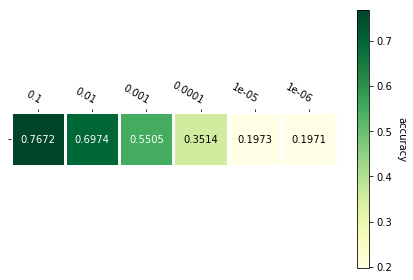

In [5]:
# Setting up parameterlist
log_p_list = [.1, .01, .001, .0001, .00001, .000001]

# k-fold cross validation over all parameteres and plotting
print("Logistic regression: Cross validation over all parameters ...")
log_scores = logistic_tester(X_train, y_train, C_list = log_p_list, folds = k, plot = plot)
print("Done.")


Support vector machines: Cross validation over all parameters ...


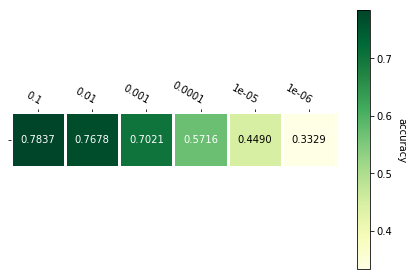

Done.


In [6]:
# Setting up parameterlist
svm_p_list = [1, .1, .01, .001, .0001, .00001, .000001]

# k-fold cross validation over all parameteres and plotting
print("Support vector machines: Cross validation over all parameters ...")
log_scores = svm_tester(X_train, y_train, C_list = log_p_list, folds = k, plot = plot)
print("Done.")



In [ ]:
# Setting up parameterlist
svm_p_list = [1, .1, .01, .001, .0001, .00001, .000001]

# k-fold cross validation over all parameteres and plotting
print("Support vector machines: Cross validation over all parameters ...")
log_scores = svm_tester(X_train, y_train, C_list = log_p_list, folds = k, plot = plot)
print("Done.")

In [ ]:
net_p_list = [.1, .01, .001, .0001, .00001, .000001]
lambda net_clf_constructor

trees_scores_array = clf_cross_validator(
    X_train, y_train, net_clf_constructor, p_list, q_list =, folds = k, plot = False, label = '')
